In [103]:
import pandas as pd
hb=pd.read_csv('haberman.data',header=None)

In [104]:
hb.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
#-- 1 = the patient survived 5 years or longer
#-- 2 = the patient died within 5 year

In [105]:
hb=hb.rename(columns={0:'Age_of_patient',1:"Patient's_year_of_operation",2:'Number_of_positive_axillary_nodes_detected',3:'Survival_status'})

In [106]:
hb.head()

,Age_of_patient,Patient's_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [107]:
hb.shape

(306, 4)

In [108]:
hb.describe()

,Age_of_patient,Patient's_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


***Remarks***:
<br>
From  above,the average patient's age is 52years old.
<br>
   it is also observed that
    patients average survival  is 5years.

In [109]:
hb.columns

Index(['Age_of_patient', 'Patient's_year_of_operation',
       'Number_of_positive_axillary_nodes_detected', 'Survival_status'],
      dtype='object')

In [110]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age_of_patient                                306 non-null int64
Patient's_year_of_operation                   306 non-null int64
Number_of_positive_axillary_nodes_detected    306 non-null int64
Survival_status                               306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [111]:
hb.isnull().any()

Age_of_patient                                False
Patient's_year_of_operation                   False
Number_of_positive_axillary_nodes_detected    False
Survival_status                               False
dtype: bool

***Remarks***
<br>
From above,it is observed that there are no missing values.

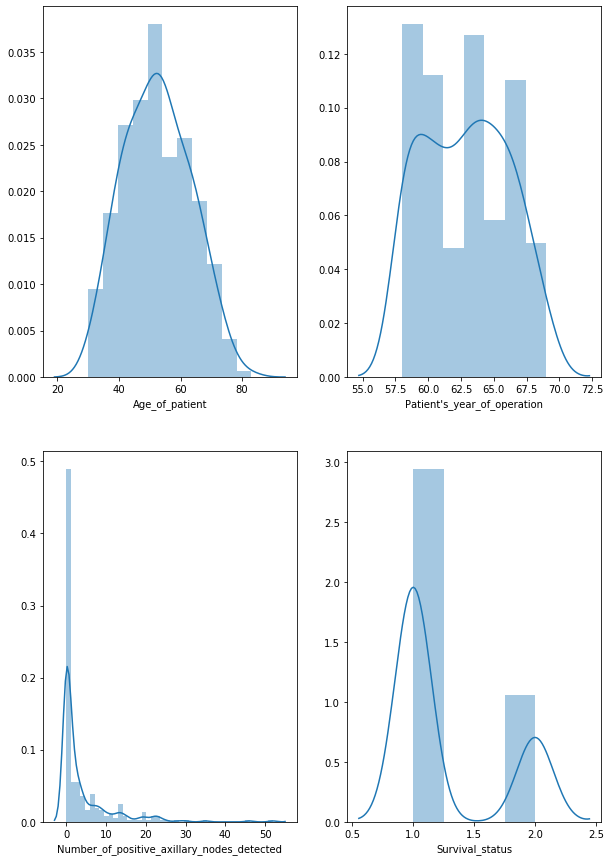

In [112]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style=('dark',{'axes.facecolor':'red'})
#sns.set_style('dark')
f,axes=plt.subplots(2,2, figsize=(10,15))
vis1=sns.distplot(hb['Age_of_patient'],ax=axes[0,0])
vis2=sns.distplot(hb["Patient's_year_of_operation"],ax=axes[0,1])                     
vis3=sns.distplot(hb['Number_of_positive_axillary_nodes_detected'],ax=axes[1,0])                  
vis4=sns.distplot(hb['Survival_status'],ax=axes[1,1])

plt.show()

** Remarks**:
<br>
From above,it is observed that the survival status is not normally distributed,so this datapoints are 
Non parametric.

In [113]:
hb['Age_of_patient'].head()

0    30
1    30
2    30
3    31
4    31
Name: Age_of_patient, dtype: int64

In [114]:
hb.columns

Index(['Age_of_patient', 'Patient's_year_of_operation',
       'Number_of_positive_axillary_nodes_detected', 'Survival_status'],
      dtype='object')

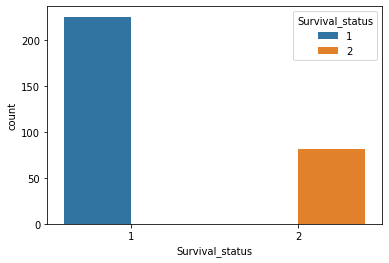

In [115]:
import seaborn as sns
from matplotlib import pyplot as plt
vis1=sns.countplot(x='Survival_status',data=hb,hue='Survival_status')

***Remarks***
<br>
From above,it is observed that most cancer patients survived 5years or longer

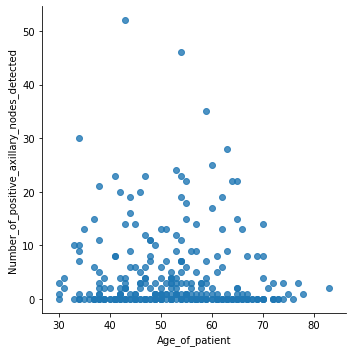

In [173]:
sns.lmplot(x='Age_of_patient',y=  'Number_of_positive_axillary_nodes_detected',data=hb,fit_reg=False)
plt.show()

***Remarks***
<br>
From above,it is observed that there is a relationship between age of patients and no_of_positive_auxilary_nodes_detected.
<br>
An outlier is also spotted where age of a particular patient is around 43 and no_of_positive_auxilary_nodes_detected is 50. 

In [150]:
hb['Age_of_patient'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: Age_of_patient, dtype: int64

***Remarks***
<br>
Above is a value count for every age of patient in the dataset.

In [142]:
hb.groupby('Age_of_patient').mean()['Survival_status'].sort_values(ascending=False)

Age_of_patient
83    2.000000
78    2.000000
46    1.571429
53    1.545455
74    1.500000
48    1.428571
62    1.428571
44    1.428571
66    1.400000
65    1.400000
43    1.363636
60    1.333333
67    1.333333
51    1.333333
61    1.333333
45    1.333333
54    1.307692
41    1.300000
56    1.285714
34    1.285714
52    1.285714
70    1.285714
57    1.272727
47    1.272727
72    1.250000
69    1.250000
42    1.222222
49    1.200000
55    1.200000
50    1.166667
39    1.166667
59    1.125000
63    1.125000
38    1.100000
31    1.000000
33    1.000000
77    1.000000
35    1.000000
36    1.000000
37    1.000000
40    1.000000
58    1.000000
76    1.000000
75    1.000000
73    1.000000
71    1.000000
68    1.000000
64    1.000000
30    1.000000
Name: Survival_status, dtype: float64

***Remarks***
<br>
Above is average survival status for every patient age.

In [169]:
f2=hb.Age_of_patient<=49
f3=hb[f2]
f3.head(3)

,Age_of_patient,Patient's_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status,Survival,survival_new
0,30,64,1,1,30-->78 years,1
1,30,62,3,1,30-->78 years,1
2,30,65,0,1,30-->78 years,1


***Remarks***
<br>
From above,I filtered age of patients that are less or equal to 49 years old.

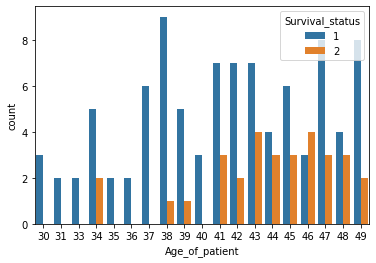

In [174]:
sns.countplot(data=f3,x='Age_of_patient',hue='Survival_status')
plt.show()

***Remarks***
 - Above is a distribution of patients ages from 30-49 with respect to there survival status.
<br>
 - From above it is observed that  cancer patients with age 46 have less than 5years to survive.
  - It is also observed that in this distribution,patients with ages 38 are most likely to survive past 5years.

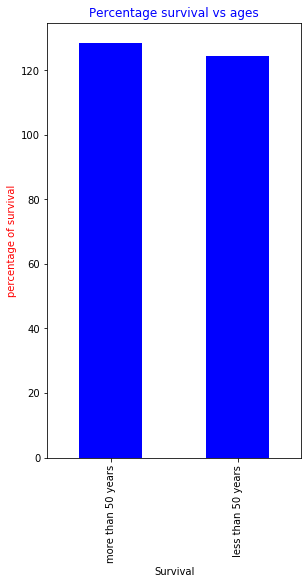

In [176]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
hb['Survival']='Between 30 to 78'
hb.loc[hb['Age_of_patient']>50,'Survival']='more than 50 years'
hb.loc[hb['Age_of_patient']<=50,'Survival']='less than 50 years'
hb['survival_new']=hb['Survival_status']
hb_rate=hb.groupby('Survival')['survival_new'].mean().sort_values(ascending=False)
(round(100*hb_rate,2)).plot.bar(color='blue')
plt.ylabel('percentage of survival',color='red')
plt.title('Percentage survival vs ages',color='blue')
plt.show()


***Remarks***
<br>
From above,it is observed that patients above 50years have higher percentage of survival.

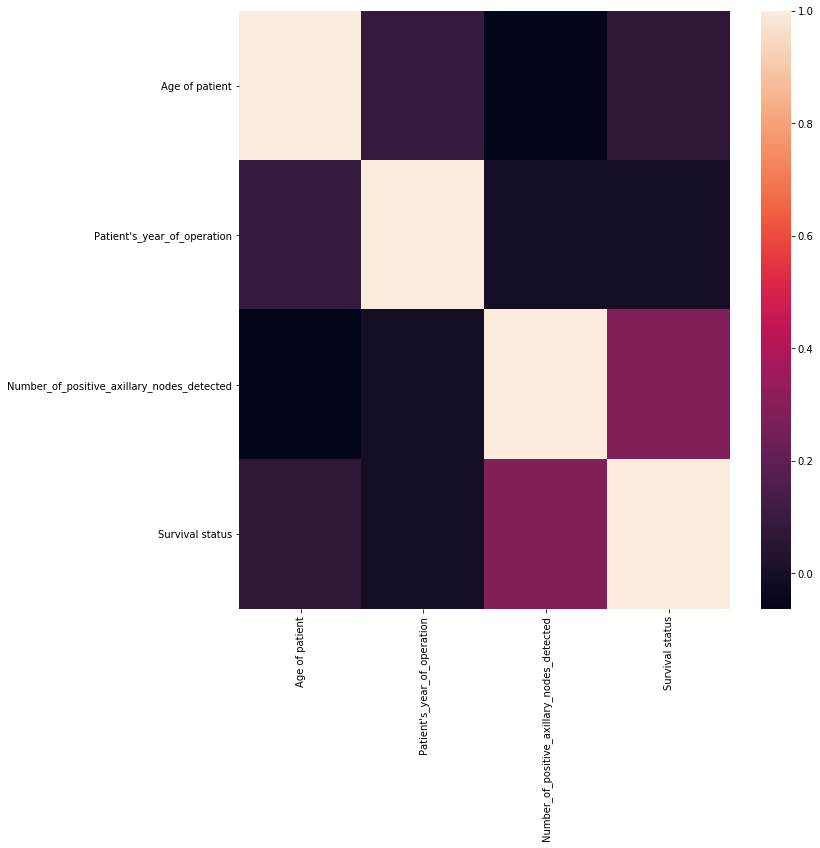

In [33]:
import seaborn as sns
corr_matrix=hb.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_matrix)
plt.show()

In [34]:
def correlation(dataset,threshold):
    col_corr=set() # it will return set of all correlated features beacause a set does not return duplicates unlike a list
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features=correlation(hb,0.6)
print(len(set(corr_features)))

0


 Remarks:
 - After setting the threshold at 0.6,no two features were discovered to be correlated together.